# Retail Case Study

In [1]:
import pandas as pd

In [2]:
customer = pd.read_csv("C:\\Data Science\\Python case studies\\Case Study 1 - Retail Case Study\\Customer.csv")
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
Product_hierarchy = pd.read_csv("C:\\Data Science\\Python case studies\\Case Study 1 - Retail Case Study\\prod_cat_info.csv")
Product_hierarchy


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [4]:
Transaction = pd.read_csv("C:\\Data Science\\Python case studies\\Case Study 1 - Retail Case Study\\Transactions.csv")
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


## Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
###     keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
Customer_Transaction = pd.merge(left = customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner',
                          indicator = True)

In [6]:
Customer_Transaction

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,both
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,both
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,both
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,both
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,both


In [7]:
Customer_Final = pd.merge(left = Customer_Transaction,
                          right = Product_hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )

In [8]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


## Q2 Summary Report

#### a. Get the column names and their corresponding data types.

In [9]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

####  b. Top/Bottom 10 observations

In [10]:
# Top 10 
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [11]:
# Bottom 10
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [12]:
import numpy as np
Data_min = Customer_Final['total_amt'].min()
Data_max = Customer_Final['total_amt'].max()
Data_q1  = np.percentile(Customer_Final.total_amt,25)
median  = np.percentile(Customer_Final.total_amt,50)
Data_q3  = np.percentile(Customer_Final.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)

Min =  -8270.925
Max =  8287.5
Median =  1761.37
Q1 =  762.45
Q3 =  3585.725


#### d. Frequency tables for all the categorical variables

In [13]:
## Store type

freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,9767,9687,9159,19589
Female,10047,10278,10142,20584


In [14]:
## Prod_cat

freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,1988,17694,4317,11640,4587,7976
Female,2008,18696,4554,12850,4407,8536


In [15]:
## Prod_subcat

freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
Female,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


## Q3.Generate histograms for all continuous variables and frequency bars for categorical variables

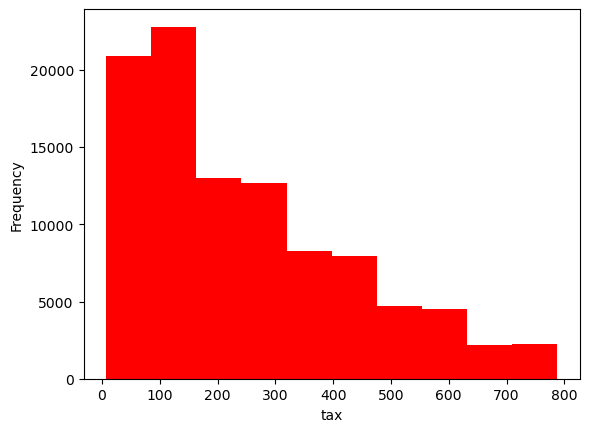

In [16]:
## Histogram for continous variables--

## 1.TAX

import matplotlib.pyplot as plt
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['red'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()


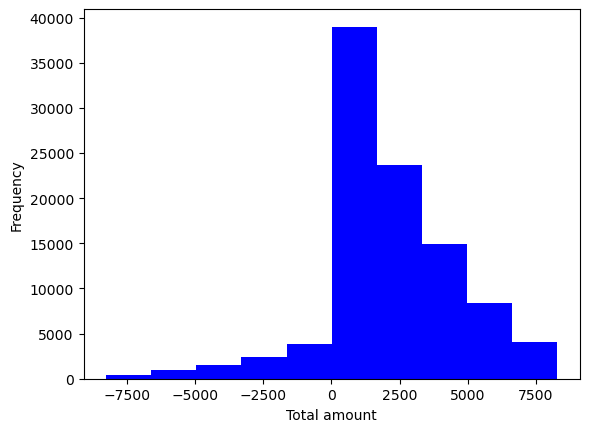

In [17]:
## 2. Total Amount
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

<Axes: >

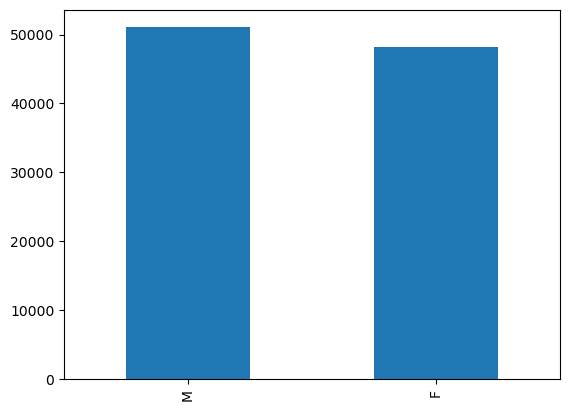

In [18]:
## Frequency bar for Categorical Variable----

## 1. Gender
Customer_Final['Gender'].value_counts().plot( kind = 'bar')

<Axes: >

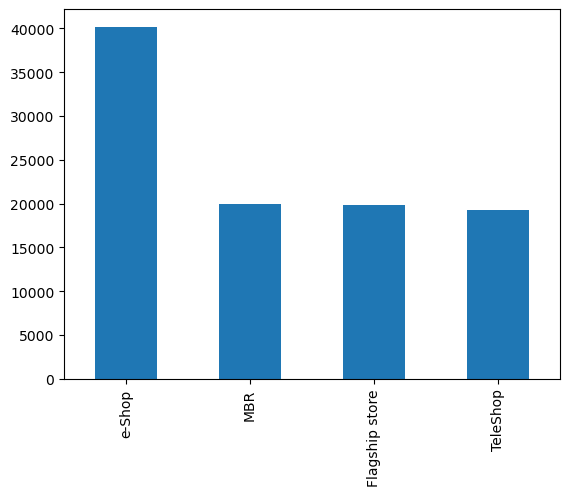

In [19]:
## 2. Store type
Customer_Final['Store_type'].value_counts().plot(kind = 'bar')

<Axes: >

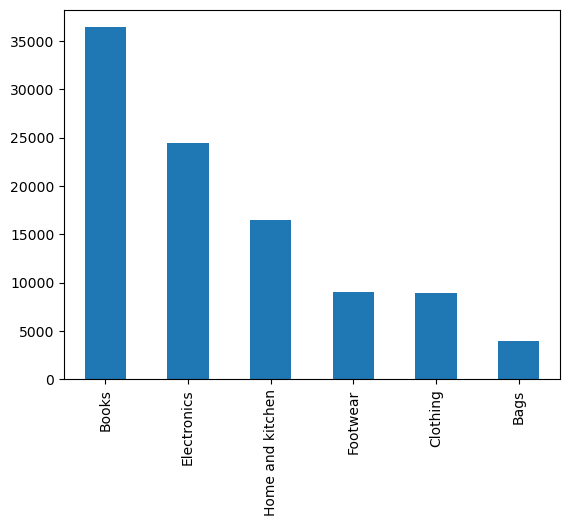

In [20]:
## 3. Product Category
Customer_Final['prod_cat'].value_counts().plot(kind = 'bar')

<Axes: >

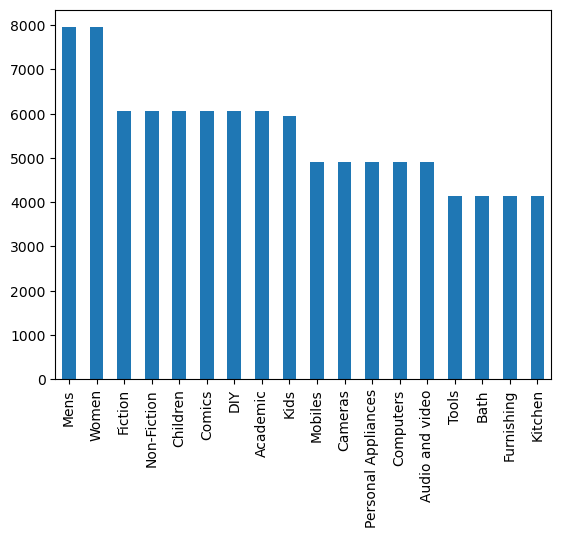

In [21]:
## 4. Product sub Category
Customer_Final['prod_subcat'].value_counts().plot(kind = 'bar')

## Q4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

### b. Count of transactions where the total amount of transaction was negative


In [22]:
df = Customer_Final['total_amt']
count2 = Customer_Final.loc[(df<0),['total_amt']].count()
count2

total_amt    9294
dtype: int64

## Q5. Analyze which product categories are more popular among females vs male customers

In [23]:
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)

'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

#### The most popular category between Male and Female is Books

## Q6.. Which City code has the maximum customers and what was the percentage of customers from that city?


In [24]:
maximum_cust = Customer_Final['city_code'].value_counts()
t = maximum_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = Customer_Final['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

'City code which has Maximum customers is : '

4.0    10571
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 0.6% : 


## Q7. Which store type sells the maximum products by value and by quantity?


In [25]:
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
display(sort_list.head(1)['Store_type'])

47986    TeleShop
Name: Store_type, dtype: object

## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship store?



In [26]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [27]:
Sf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = Sf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 28515547.125


## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [28]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


## Q11. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [29]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_9820\1786456999.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,53
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,53
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction,53
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children,53
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women,31
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids,31
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens,31
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women,31


In [30]:
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount earned',total)

Total amount earned 21751521.675


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [31]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  5591225.965


C:\Users\DELL\AppData\Local\Temp\ipykernel_9820\1622796998.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
